## Einfaktorieller ANOVA-Hypothesentest
----------------------------------------

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
from random import sample
from scipy.stats import f
from scipy import stats
import statsmodels.api as smi
from scipy.stats import f_oneway

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Der Zweck eines **einfaktoriellen ANOVA-Hypothesentests** ist der Vergleich von $k$ Grundgesamtheits-/Gruppenmittelwerten, $\mu_1, \mu_2,...,\mu_k$. 
Die folgenden Annahmen müssen erfüllt sein, damit eine einseitige ANOVA angewendet werden kann ({cite:p}`fahrmeirstatistik` s.485):

- Zufällige Stichproben
- Unabhängige Stichproben
- Für jede Grundgesamtheit ist die betrachtete Variable normalverteilt.
- Die Standardabweichungen der betrachteten Variable sind für alle Grundgesamtheiten gleich.

Ein einfaktorieller ANOVA-Hypothesentest folgt demselben schrittweisen Verfahren wie andere Hypothesentests. 

\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p\le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}

### Einfaktorieller ANOVA-Hypothesentest: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den **einfaktoriellen ANOVA-Hypothesentest** in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [31]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.*

Um den **einfaktoriellen ANOVA-Hypothesentest** zu veranschaulichen, untersuchen wir das mittlere Jahresgehalt der Absolventen, gruppiert nach ihrem Hauptstudienfach. Zur Verdeutlichung: In diesem Beispiel erfolgt die Klassifizierung/Gruppierung durch eine Variable, die Hauptvariable, den so genannten Faktor, wir führen alsoe eine einfaktorielle ANOVA durch. In dieser Übung **wollen wir testen, ob sich das mittlere Jahresgehalt der Absolventen zwischen den Absolventen verschiedener Studienfächer unterscheidet.**

### Datenexploration und Aufbereitung

Wir beginnen unsere Datenanalyse mit dem Zufallsstichprobenverfahren. Wir ziehen eine Zufallsstichprobe von $275$ Studenten aus dem Datensatz mit Hilfe der `sample()` Methode in Python. Wir wollen sicherstellen, dass wir nur Studenten mit abgeschlossenem Studium in die Stichprobe aufnehmen, deshalb unterteilen wir die Daten des Dataframes zuvor in Python. Des Weiteren reduzieren wir unseren Datensatz auf die zwei Variablen von Interesse, die kategoriale Variable `major` und die numerische Variable `salary`. Dann zeigen wir die ersten $10$ Zeilen des Datensatzes an.

In [32]:
n=275
graduated = students.loc[students['graduated'] == 1]
data = pd.DataFrame(graduated['major'].sample(n,random_state=1))
data['salary']=graduated['salary']
data.head(10)

,major,salary
5019,Biology,49976.937146
4477,Political Science,27821.990115
241,Environmental Sciences,37668.890265
7166,Biology,60958.213489
2489,Economics and Finance,59920.480581
1194,Mathematics and Statistics,46116.221731
242,Social Sciences,35881.736200
2969,Economics and Finance,48456.787464
1476,Mathematics and Statistics,61384.549346
6765,Biology,61819.845923


Aus reinem Interesse visualisieren wir die Zählungen für jede der $6$ verschiedenen Studienteilnehmer in unserer Stichprobe, indem wir ein Balkendiagramm erstellen. Wir verwenden die `barh()` Funktion aus der `mathplotlib` Bibliothek für die Darstellung.

Text(0.5, 0, 'Anzahl')

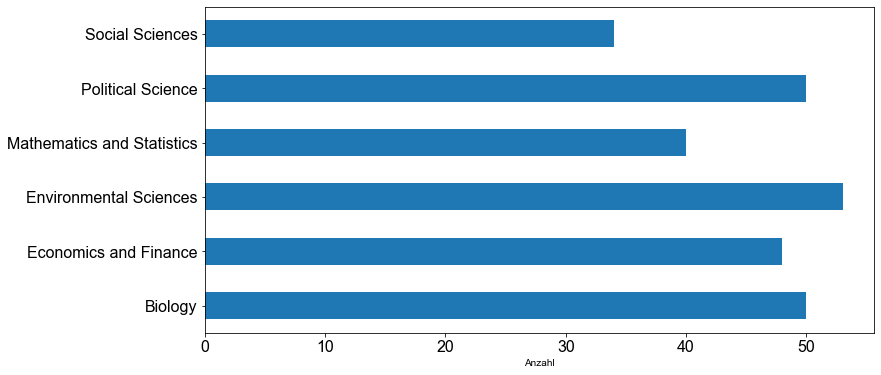

In [33]:
fig, ax = plt.subplots()
data.groupby('major')['salary'].count().plot.barh(ax=ax)
ax.set_ylabel('')
ax.set_xlabel('Anzahl')

Wir sehen, dass die verschiedenen Studienteilnehmer in unserer Stichprobe nicht gleich verteilt sind, aber das ist in Ordnung.

Bevor wir mit dem Hypothesentest beginnen, überprüfen wir, ob die Annahmen für den einfaktoriellen ANOVA-Hypothesentest erfüllt sind. Die Stichproben sind Zufallsstichproben und unabhängig. Das ist in Ordnung. Wir überprüfen die Normalitätsannahme, indem wir für jede gruppierte Variable ein Normalwahrscheinlichkeitsdiagramm (<a href="https://de.wikipedia.org/wiki/Quantil-Quantil-Diagramm">Q-Q-Diagramm</a>) erstellen.

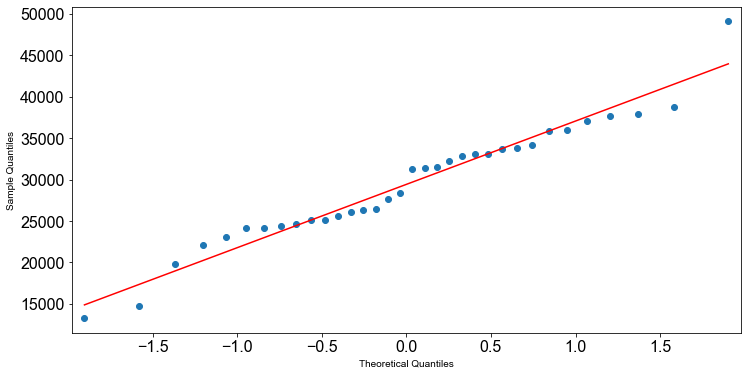

In [37]:
# Erzeuge Q-Q Plot
data_idx = data.loc[data['major']== 'Social Sciences']
smi.qqplot(data_idx['salary'], line = "r")
#ax1 = plt.gca
pylab.show()

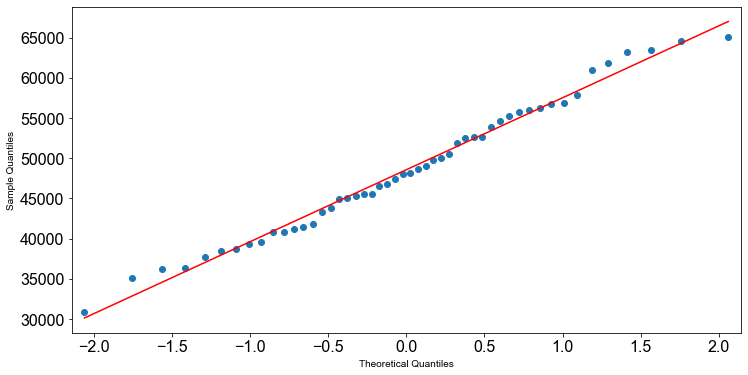

In [38]:
# Erzeuge Q-Q Plot
data_idx = data.loc[data['major']== 'Biology']
smi.qqplot(data_idx['salary'], line = "r")
pylab.show()

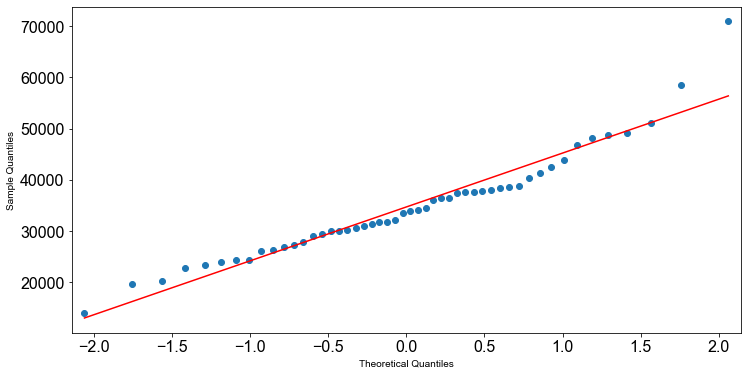

In [39]:
# Erzeuge Q-Q Plot
data_idx = data.loc[data['major']== 'Political Science']
smi.qqplot(data_idx['salary'], line = "r")
pylab.show()

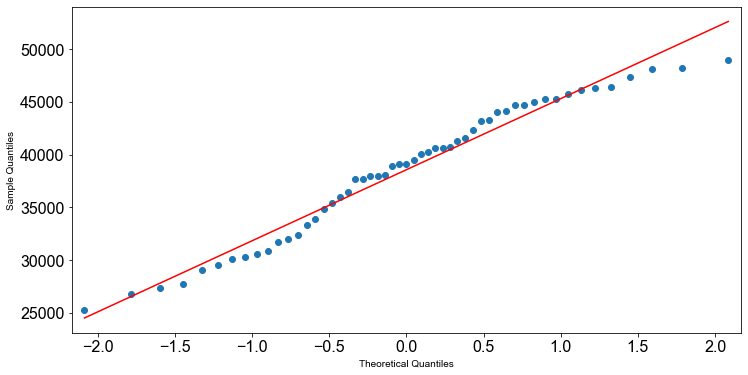

In [40]:
# Erzeuge Q-Q Plot
data_idx = data.loc[data['major']== 'Environmental Sciences']
smi.qqplot(data_idx['salary'], line = "r")
pylab.show()

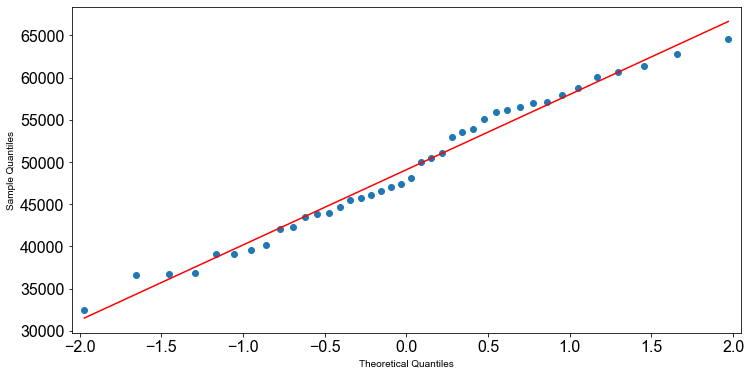

In [41]:
# Erzeuge Q-Q Plot
data_idx = data.loc[data['major']== 'Mathematics and Statistics']
smi.qqplot(data_idx['salary'], line = "r")
pylab.show()

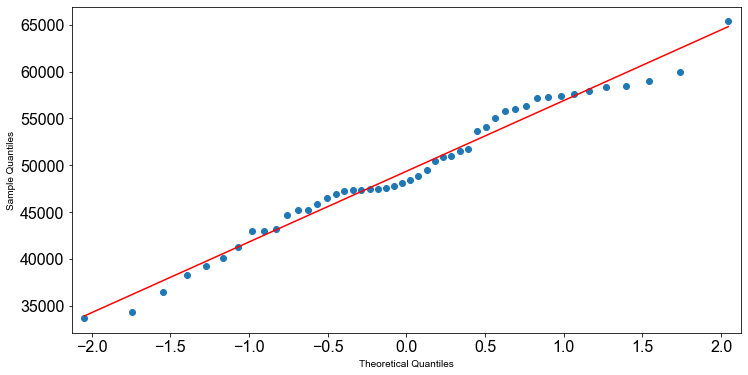

In [42]:
# Erzeuge Q-Q Plot
data_idx = data.loc[data['major']== 'Economics and Finance']
smi.qqplot(data_idx['salary'], line = "r")
pylab.show()

Als nächstes testen wir die Annahme gleicher Standardabweichungen. Dazu berechnen wir die Standardabweichung für jede Gruppe. Die Programmiersprache Python bietet einige ausgezeichnete Funktionen zur Berechnung statistischer Parameter für verschiedene Gruppierungen eines Datensatzes. Für unser Beispiel verwenden wir die Funktion `pivot_table()`, um die Standardabweichungen für jede Gruppe zu berechnen.

In [66]:
table = pd.pivot_table(data, values='salary',index=['major'],aggfunc=np.std)
table

,salary
major,
Biology,8470.016077
Economics and Finance,7175.592532
Environmental Sciences,6460.464096
Mathematics and Statistics,8384.559216
Political Science,10273.903367
Social Sciences,7227.381892


Als Faustregel gilt die Annahme gleicher Standardabweichungen als erfüllt, wenn das Verhältnis der größten zur kleinsten Standardabweichung der Stichprobe kleiner als $2$ ist (Weiss 2010).

In [67]:
ratio = table.max()/table.min()
ratio

salary    1.590273
dtype: float64

Das Verhältnis zwischen der größten und der kleinsten Standardabweichung der Stichprobe beträgt $1,59$. Das liegt nahe am Schwellenwert von $2$, ist aber für unser Musterbeispiel noch akzeptabel. Daraus können wir schließen, dass die Annahmen erfüllt sind.

Beachten Sie, dass die einseitige ANOVA robust gegenüber moderaten Verstößen gegen die Normalitätsannahme und die Annahme gleicher Standardabweichungen ist ({cite:p}`fahrmeirstatistik` s.486).

### Überprüfung der Hypothesen

Um den **einfaktoriellen ANOVA-Hypothesentest** durchzuführen, folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass das mittlere Jahresgehalt bei allen Gruppen von Absolventen gleich ist.

$$H_0: \quad \mu_1=\mu_2=\mu_3=\mu_4=\mu_5=\mu_6$$

**Alternative Hypothese**

$$H_A: \quad \text{Nicht alle Mittelwerte sind gleich}$$

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,01$$

In [68]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Um die $F$-Test-Statistik zu berechnen, müssen wir zuvor mehrere Größen bestimmen. Zur Veranschaulichung berechnen wir die $F$-Teststatistik manuell in Python. Schritt für Schritt füllen wir die ANOVA-Tabelle aus, bis wir schließlich die $F$-Teststatistik und folglich den $p$-Wert erhalten.

\begin{array}{|l|c|}
\hline
\ \text{Quelle} & df & \text{Summe der Quadrate }(SS) & \text{Mittlere Quadrate }(MS) & F\text{-Statistik} & p\text{-Wert}\\
\hline
\ \text{Gruppe/Klasse} & k-1 & SSG & MSG=\frac{SSG}{k-1} & F = \frac{MSG}{MSE} & p\\
\ \text{Fehler/Residuen} & n-k & SSE & MSE=\frac{SSE}{n-k} & & \\
\hline 
\ \text{Insgesamt} & n-1 & SST & & & \\
\hline 
\end{array}

Wir beginnen mit der ersten Spalte und berechnen die Freiheitsgrade.

In [69]:
k = len((data['major'].unique()))
n = len(data)

df_G = k - 1
df_G

5

In [70]:
df_E = n-k
df_E

269

In [71]:
df_T = n - 1
df_T

274

\begin{array}{|l|c|}
\hline
\ \text{Quelle} & df & \text{Summe der Quadrate }(SS) & \text{Mittlere Quadrate }(MS) & F\text{-Statistik} & p\text{-Wert}\\
\hline
\ \text{Gruppe/Klasse} & 5 & SSG & MSG=\frac{SSG}{k-1} & F = \frac{MSG}{MSE} & p\\
\ \text{Fehler/Residuen} & 269 & SSE & MSE=\frac{SSE}{n-k} & & \\
\hline 
\ \text{Insgesamt} & 274 & SST & & & \\
\hline 
\end{array}

Außerdem berechnen wir die drei Summen der Quadrate, $SST$, $SSG$ und $SSE$. Erinnern Sie sich an die Gleichungen von oben.

$$SST = \sum_{i=1}^n(x_i-\bar x)^2\text{,}$$

wobei $x_i$den Beobachtungen in den Stichproben und $\bar x$ dem Gesamtmittelwert aller Stichproben entspricht.

In [72]:
# calculate overall mean
x_bar = np.mean(data['salary'])

# observation data
xi = data['salary']

# calculate SST
SST = np.sum((xi - x_bar)**2)
SST

33169011167.80223

$$SSG = \sum_{i=1}^n n_j(\bar x_i-\bar x)^2$$

Dabei steht $n_j$ für den Stichprobenumfang der Gruppe $j, \bar{x}_i$ für den Mittelwert der Gruppe $j$ und $\bar x$ für den Gesamtmittelwert aller Stichproben.

In [73]:
# Berechne Stichprobengrösse für alle Gruppen
n_j = pd.pivot_table(data, values='salary',index=['major'],aggfunc=len)

# Berechne Mittelwert für alle Gruppen
xi_bar = pd.pivot_table(data, values='salary',index=['major'],aggfunc=np.mean)

# Berechne SSG
SSG = np.sum(n_j * (xi_bar - x_bar)**2)
SSG

salary    1.542576e+10
dtype: float64

$$SSE = \sum_{i=1}^n (n_j-1)s_j^2\text{,}$$

wobei $n_j$ den Stichprobenumfang für die Gruppe $j$ und $s^2_j$ die Varianz der Gruppe $j$ bezeichnet.

In [74]:
# calculate standart deviation for each group
s2_j = pd.pivot_table(data, values='salary',index=['major'],aggfunc=np.std)

# calculate SSE
SSE = np.sum((n_j-1.0)*s2_j**2.0)
SSE

salary    1.774325e+10
dtype: float64

In [75]:
# alternatively one may calculate SSE this way 
SSE2 = SST - SSG
SSE2

salary    1.774325e+10
dtype: float64

\begin{array}{|l|c|}
\hline
\ \text{Quelle} & df & \text{Summe der Quadrate }(SS) & \text{Mittlere Quadrate }(MS) & F\text{-Statistik} & p\text{-Wert}\\
\hline
\ \text{Gruppe/Klasse} & 5 & 1,542576 \cdot 10^{10} & MSG=\frac{SSG}{k-1} & F = \frac{MSG}{MSE} & p\\
\ \text{Fehler/Residuen} & 269 & 1,774325 \cdot 10^{10} & MSE=\frac{SSE}{n-k} & & \\
\hline 
\ \text{Insgesamt} & 274 & 3,316901 \cdot 10^{10} & & & \\
\hline 
\end{array}

Nun berechnen wir die beiden Maße für die mittlere Variabilität, $MSG$ und $MSE$.

In [76]:
# calculate MSG
MSG = SSG/(k-1)
MSG

salary    3.085152e+09
dtype: float64

In [77]:
# calculate MSE
MSE = SSE/(n-k)
MSE

salary    6.596004e+07
dtype: float64

\begin{array}{|l|c|}
\hline
\ \text{Quelle} & df & \text{Summe der Quadrate }(SS) & \text{Mittlere Quadrate }(MS) & F\text{-Statistik} & p\text{-Wert}\\
\hline
\ \text{Gruppe/Klasse} & 5 & 1,542576 \cdot 10^{10} & 3,085152 \cdot 10^{9} & F = \frac{MSG}{MSE} & p\\
\ \text{Fehler/Residuen} & 269 & 1,774325 \cdot 10^{10} & 6,596004 \cdot 10^{7} & & \\
\hline 
\ \text{Insgesamt} & 274 & 3,316901 \cdot 10^{10} & & & \\
\hline 
\end{array}

Schließlich erhalten wir die $F$-Statistiken durch das Verhältnis von $MSG$ und $MSE$.

In [78]:
Fstat = MSG/MSE
Fstat

salary    46.77304
dtype: float64

\begin{array}{|l|c|}
\hline
\ \text{Quelle} & df & \text{Summe der Quadrate }(SS) & \text{Mittlere Quadrate }(MS) & F\text{-Statistik} & p\text{-Wert}\\
\hline
\ \text{Gruppe/Klasse} & 5 & 1,542576 \cdot 10^{10} & 3,085152 \cdot 10^{9} & F = 46,77304 & p\\
\ \text{Fehler/Residuen} & 269 & 1,774325 \cdot 10^{10} & 6,596004 \cdot 10^{7} & & \\
\hline 
\ \text{Insgesamt} & 274 & 3,316901 \cdot 10^{10} & & & \\
\hline 
\end{array}

Im letzten Schritt berechnen wir den $p$-Wert durch Aufruf der Funktion `f.cdf()` in Python. Erinnern Sie sich, wie man die Freiheitsgrade berechnet.

$$df = (k-1, n-k)$$

Da die Nullhypothese nur dann abgelehnt wird, wenn die Teststatistik $F$ zu groß ist, ist ein einfaktorieller ANOVA-Test immer rechtsschief.

In [79]:
df1 = k-1
df2 = n-k

p_value = f.sf(Fstat, dfn = df1, dfd = df2)
p_value

array([1.09321209e-34])

\begin{array}{|l|c|}
\hline
\ \text{Quelle} & df & \text{Summe der Quadrate }(SS) & \text{Mittlere Quadrate }(MS) & F\text{-Statistik} & p\text{-Wert}\\
\hline
\ \text{Gruppe/Klasse} & 5 & 1,542576 \cdot 10^{10} & 3,085152 \cdot 10^{9} & F = 46,77304 & 1,093212 \cdot 10^{-34}\\
\ \text{Fehler/Residuen} & 269 & 1,774325 \cdot 10^{10} & 6,596004 \cdot 10^{7} & & \\
\hline 
\ \text{Insgesamt} & 274 & 3,316901 \cdot 10^{10} & & & \\
\hline 
\end{array}

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [80]:
p_value <= alpha

array([ True])

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=1,093212 \cdot 10^{-34}$. Bei einem Signifikanzniveau von $1 \%$ liefern die Daten sehr starke Hinweise darauf, dass sich mindestens ein Paar von Gruppenmittelwerten voneinander unterscheidet.

### Hypothesentests in Python

Wir haben gerade einen einfaktoriellen ANOVA-Hypothesentest in Python manuell durchgeführt. Toll, aber jetzt wiederholen wir das Beispiel und nutzen die Möglichkeiten von Python, um das gleiche Ergebnis wie oben mit nur wenigen Zeilen Code zu erhalten!

Um einen einseitigen ANOVA-Hypothesentest in Python durchzuführen, verwenden wir die Funktion `f_oneway()`. Die `f_oneway()`-Funktion erwartet die Eingabe der zu vergleichenden Untergruppen, also geben wir unsere Daten jeweils in der Form `data['salary'][data['major'] == eg:'Biology']`. Außerdem lesen wir die $F$-Teststatistik `statistics` und $p$-Wert `p_value` aus.

In [81]:
statistics, pvalue = stats.f_oneway(data['salary'][data['major'] == 'Biology'],
               data['salary'][data['major'] == 'Social Sciences'],
               data['salary'][data['major'] == 'Economics and Finance'],
               data['salary'][data['major'] == 'Political Science'],
               data['salary'][data['major'] == 'Mathematics and Statistics'],
               data['salary'][data['major'] == 'Environmental Sciences'])

print('Wert der F-Statistik :',statistics)
print('p-Wert :',pvalue)

Wert der F-Statistik : 46.77304030428687
p-Wert : 1.0932120917246151e-34


Es hat gut funktioniert! Vergleichen Sie die Ausgabe der Funktion `f_oneway()` mit unserem Ergebnis von oben. Auch hier können wir zu dem Schluss kommen, dass die Daten bei einem Signifikanzniveau von $1 \%$ sehr starke Hinweise darauf liefern, dass sich mindestens ein Paar von Gruppenmitteln voneinander unterscheidet.